<a href="https://colab.research.google.com/github/simmibaghel/Inventory_optimization_supply_chain-audit/blob/main/Inventory_and_supply_chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Setting seed for consistency
np.random.seed(42)

# Create 500 rows of product logistics data
n_products = 500
data = {
    'Product_ID': [f'PROD_{i:03}' for i in range(n_products)],
    'Category': np.random.choice(['Electronics', 'Appliances', 'Accessories'], n_products),
    'Unit_Cost': np.random.uniform(10, 500, n_products),
    'Annual_Demand': np.random.randint(500, 10000, n_products),
    'Order_Cost': [50] * n_products,  # Fixed cost to place an order
    'Holding_Cost_Pct': [0.15] * n_products, # 15% of unit cost to store
    'Lead_Time_Days': np.random.randint(3, 15, n_products),
    'Lead_Time_Variance': np.random.uniform(1, 4, n_products), # For RCA analysis
    'Stock_Level': np.random.randint(50, 2000, n_products)
}

df = pd.DataFrame(data)

# Calculate key Optimization Metrics
df['Daily_Demand'] = df['Annual_Demand'] / 365
df['Carrying_Cost'] = df['Unit_Cost'] * df['Holding_Cost_Pct']

# Save to CSV
df.to_csv('inventory_optimization_data.csv', index=False)
print("Dataset 'inventory_optimization_data.csv' created successfully!")

Dataset 'inventory_optimization_data.csv' created successfully!


In [2]:
# Add this to your Python script
# EOQ = sqrt( (2 * Annual_Demand * Order_Cost) / Carrying_Cost )
df['EOQ'] = np.sqrt((2 * df['Annual_Demand'] * df['Order_Cost']) / df['Carrying_Cost']).astype(int)

# Safety Stock (To prevent stockouts)
# Formula: Z-score (1.65 for 95% service level) * Standard Deviation of Demand * sqrt(Lead Time)
df['Safety_Stock'] = (1.65 * df['Daily_Demand'].std() * np.sqrt(df['Lead_Time_Days'])).astype(int)

# Reorder Point (When to buy more)
df['Reorder_Point'] = (df['Daily_Demand'] * df['Lead_Time_Days'] + df['Safety_Stock']).astype(int)

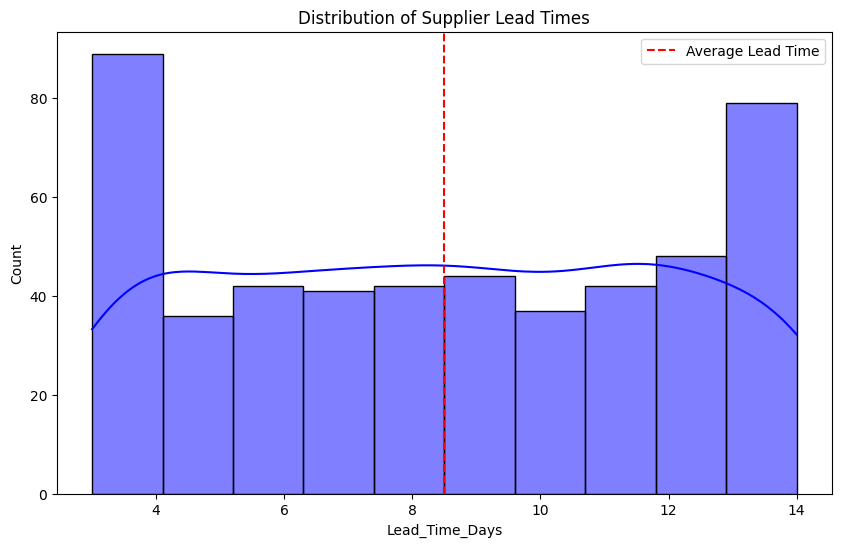

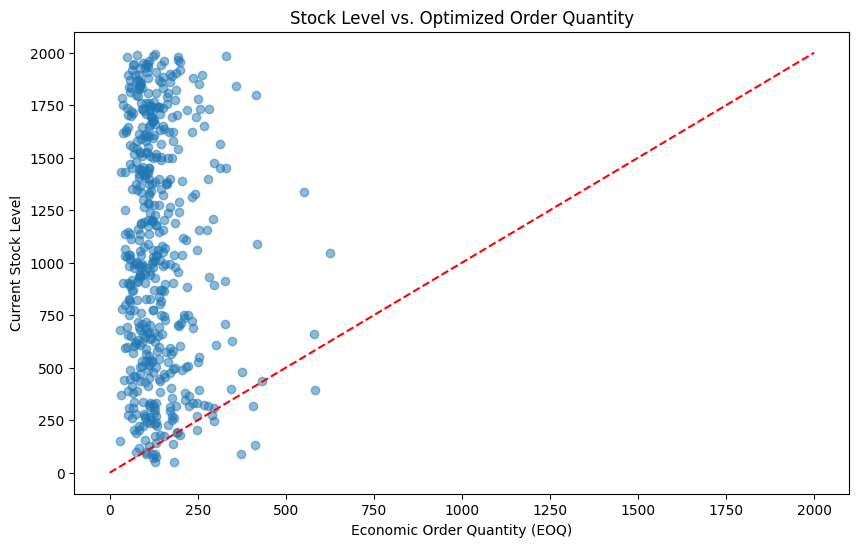

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of Lead Times (RCA Analysis)
plt.figure(figsize=(10, 6))
sns.histplot(df['Lead_Time_Days'], kde=True, color='blue')
plt.title('Distribution of Supplier Lead Times')
plt.axvline(df['Lead_Time_Days'].mean(), color='red', linestyle='--', label='Average Lead Time')
plt.legend()
plt.show()

# 2. EOQ vs. Current Stock (Optimization Check)
plt.figure(figsize=(10, 6))
plt.scatter(df['EOQ'], df['Stock_Level'], alpha=0.5)
plt.xlabel('Economic Order Quantity (EOQ)')
plt.ylabel('Current Stock Level')
plt.title('Stock Level vs. Optimized Order Quantity')
plt.plot([0, 2000], [0, 2000], color='red', linestyle='--') # 45-degree line
plt.show()